## Quantum Random Number Generators

Pick a random number between 1 and 10. 

Was it 7?    

Humans are really bad at picking random numbers. For instance, choosing 1 or 10 doesn’t seem so random because they are the largest and smallest numbers. A number picked near the middle intuitively feels more random than one at the higher or lower end. Even numbers seem less random than odd ones (though there is no reason for this to be true). 


## Why do we want random numbers?

For much of human history, random numbers were only used in games of chance. Dice go back 5,000 years (Piovano, 2011/2016). During WW2, random numbers became an important statistical tool for von Neumann when he was working on the Manhattan project (Metropolis, 1987) and for use by the Germans in sending encrypted messages. 
From the Manhattan project (Metropolis, 1987) came Monte Carlo methods. These are simulations that take a large number of samples from a model using random numbers to compute something that would be difficult to solve otherwise. They are a powerful and ubiquitous tool in physics, economics and data science. It became clear that random numbers were increasingly useful in areas of science, cryptography and statistics. More recently, with the abundance of private information sent over the internet, there is considerable need to generate a large number of random numbers for various encryptions standards (Zhou & Tang, 2011).

## The limitations of pseudorandom number generators  


Pseudorandom number generators (PRNGs) and do not actually produce random numbers. Anyone who knows the seed (initial random number) and the algorithm can generate the entire sequence with complete certainty. If left to run for long enough, both the middle square method and linear congruential method will repeat. This is fine for videogames where it is the feeling of randomness which matters, but not so great for encrypting communications (Li, 2013). With insider knowledge of the PRNG, an attacker could decrypt the communication.

## Quantum RNG

Thankfully there are ways of generating truly random numbers based on physical processes. Atmospheric noise, the cosmic microwave background (the effect that caused static on old TVs) and radioactive decay are good examples. We can measure radio wave or microwave radiation, or the number of clicks from a Geiger counter.
Quantum computers can also be used for this purpose. They are effectively controlled physical experiments leveraging quantum mechanics to perform some computation. Since randomness is an inherent part of quantum mechanics, quantum computers, unlike classical ones used by von Neumann, can serve as a True Random Number Generator (TRNG) (Jacak, 2021). This is because a quantum system can exist in a superposition of possible states, and following a measurement takes on one of these states. Whilst we can know the probability of the system taking each of these states, we cannot know with absolute certainty which it will take (Nielsen & Chuang, 2000).

Below is an example of how n random numbers (from 0 to nmax) can be generated using IBM’s quantum computer. The code creates a quantum circuit with enough qubits to represent the power of 2 greater than nmax. The qubits are then put into a superposition and measured to obtain the random number. This process is repeated 1000 times and sampled n times to produce the numbers.  

The TRNG implemented here is hardly the most practical implementation. It is rather slow, requires access to IBM’s cloud infrastructure, is vulnerable to interception, and runs on a device cooled to nearly absolute zero. A more useful implementation of this concept was done 20 years ago by the Swiss company ID Quantique, using a photonic chip. Newer models can be integrated in desktop PCs with PCIe connectivity or even USB (ID Quantique, n.d.).

In [1]:
%matplotlib

import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit,execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit import IBMQ
import qiskit.tools.jupyter
plt.style.use('seaborn')


# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

Using matplotlib backend: Qt5Agg


ibmqfactory.load_account:WARNING:2022-09-25 10:54:19,729: Credentials are already in use. The existing account in the session will be replaced.


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [2]:
backend = provider.get_backend('ibmq_manila')
backend

<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
n = 10                         #Random integer maximum
numbers = 8
print("Generate {} random number(s) in the range [1,{}]".format(numbers,n))
nb = bin(n)                     #binary representation of n

nq = len(str(nb)) -2            #Number of qubits requierd

print("{} qubits will be required".format(nq))

qrng = QuantumCircuit(nq)       #Define our quantum circuit

for i in range(nq ):            #Place a Hadamard on each qubit
    qrng.h(i)

qrng.measure_all()              #Measure all Qubits
qrng.draw()


#Execute the quantum circuit and store the results
counts = execute(qrng,Aer.get_backend('qasm_simulator'),shots = 10000).result().get_counts() 
fig =  plot_histogram(counts) #Show results as historgram

Generate 8 random number(s) in the range [1,10]
4 qubits will be required


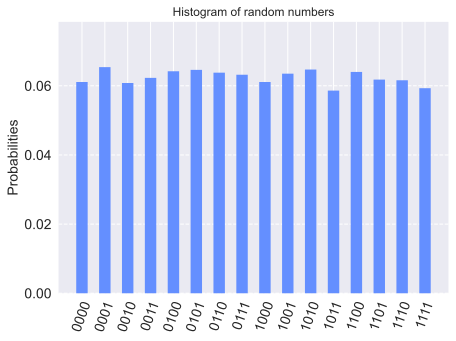

In [4]:
%matplotlib inline
# %matplotlib
legend = [i for i in range(16)]


plot_histogram(counts, title = 'Histogram of random numbers', bar_labels=False)

In [6]:
nr =[] #Store random numbers in a list

j = 0
while j < numbers:
    for i in counts: #Sample all the counts
    
        k = int(i,2)
        if k < n:
            nr.append(k)
            j = j+  1
            
print(nr)

seed = np.random.randint(100,200)

print(seed)
r1 = seed**2
print(r1)


print(nr)

n = 2020 
nb = bin(n)

print(nb)

nq = len(str(nb)) -2

print(nq)


166
27556


In [9]:
#Runnning on IBM Santiago

backend = provider.get_backend('ibmq_manila')

n = 10                         #Random integer maximum
numbers = 8                     #Number of random numbers
nb = bin(n)                     #binary representation of n
nr =[]                          #Store random numbers in a list
nq = len(str(nb)) -2            #Number of qubits required

qrng = QuantumCircuit(nq)       #Define our quantum circuit#
for i in range(nq):            #Place a Hadamard on each qubit
    qrng.h(i)
qrng.measure_all()              #Measure all Qubits
#Execute the quantum circuit and store the results
counts = execute(qrng,backend,shots = 1000).result().get_counts() 

j = 0
while j < numbers:
    for i in counts: #Sample all the counts
    
        k = int(i,2)
        if k < n:
            nr.append(k)
            j = j+  1
            
plot_histogram(counts) #Show results as histogram
print(nr)

In [ ]:
#Random Number generator

backend = Aer.get_backend('qasm_simulator')

nmax = 31                       #Random integer maximum
nr =[]                          #Store random numbers in a list
n = 8                           #Number of random numbers
nb = bin(nmax)                  #binary representation of n
nq = len(str(nb)) -2            #Number of qubits required

qrng = QuantumCircuit(nq)       #Define our quantum circuit
for i in range(nq ):            #Place a Hadamard on each qubit
    qrng.h(i)
qrng.measure_all()              #Measure all Qubits

#Execute the quantum circuit and store the results
counts = execute(qrng,backend,shots = 1000).result().get_counts() 

j = 0
while j < n:
    for i in counts:            #Sample all the counts
    
        k = int(i,2)            #convert from binary back to decimal
        if k < n :              #add to the list if they are less than nmax
            nr.append(k)
            j = j+  1
print(nr)

qrng.draw()

In [10]:
%qiskit_version_table

## References 

ID Quantique. (n.d.). Quantis QRNG Chip. Retrieved from https://www.idquantique.com/random-number-generation/products/quantis-qrng-chip/

Jacak, M. J. (2021). Quantum generators of random numbers. Sci Rep.

Li, A. (2013). Potential Weaknesses In Pseudorandom Number Generators.

Metropolis, N. (1987). The Beginning of the Monte Carlo Method. Los Alamos Science Special Issue, 15.

Neuman, J. v. (1951). Various Techniques Used in Connection With Random Digits. Res. Nat. Bur. Stand. Appl. Math. 

Nielsen, M. A., & Chuang, I. L. (2000). Quantum Computation and Quantum Information. Cambridge University Press.

Piovano, I. (2011/2016). In Logic and Belief in Indian Philosophy. Warsaw Indological Studies.

Thomson, W. E. (1958). A Modified Congruence Method of Generating Pseudo-random Numbers. The Computer journal , 83.

Zhou, X., & Tang, X. (2011). Research and implementation of RSA algorithm for encryption and decryption. Research and implementation of RSA algorithm for encryption and decryption. 

